## [Basic Gradient Descent Algorithm](https://realpython.com/gradient-descent-algorithm-python/)

The gradient descent algorithm is an approximate and iterative method for mathematical optimization. You can use it to approach the minimum of any differentiable function.

Although gradient descent sometimes gets stuck in a local minimum or a saddle point instead of finding the global minimum, it's widely used in practice. Data science and machine learning methods often apply it internally to optimize model parameters. For example, neural networks find weights and biases with gradient descent.

## Cost Function: The Goal of Optimization

The cost function, or loss function, is the function to be minimized (or maximized) by varying the decision variables. Many machine learning methods solve optimization problems under the surface.

They tend to minimize the difference between actual and predicted outputs by adjusting the model parameters (like weights and biases for neural networks, decision rules for random forest or gradient boosting, and so on).

In a regression problem, you typically have the vectors of input variables 𝐱 = (𝑥₁, …, 𝑥ᵣ) and the actual outputs 𝑦. You want to find a model that maps 𝐱 to a predicted response 𝑓(𝐱) so that 𝑓(𝐱) is as close as possible to 𝑦. For example, you might want to predict an output such as a person's salary given inputs like the person's number of years at the company or level of education.

Your goal is to minimize the difference between the prediction 𝑓(𝐱) and the actual data 𝑦. This difference is called the residual.

In this type of problem, you want to minimize the sum of squared residuals (SSR), where SSR = Σᵢ(𝑦ᵢ − 𝑓(𝐱ᵢ))² for all observations 𝑖 = 1, …, 𝑛, where 𝑛 is the total number of observations. Alternatively, you could use the mean squared error (MSE = SSR / 𝑛) instead of SSR.

Both SSR and MSE use the square of the difference between the actual and predicted outputs. The lower the difference, the more accurate the prediction. A difference of zero indicates that the prediction is equal to the actual data.

SSR or MSE is minimized by adjusting the model parameters. For example, in linear regression, you want to find the function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, so you need to determine the weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ that minimize SSR or MSE.

## Gradient of a Function: Calculus Refresher

In calculus, the derivative of a function shows you how much a value changes when you modify its argument (or arguments). Derivatives are important for optimization because the zero derivatives might indicate a minimum, maximum, or saddle point.

The gradient of a function 𝐶 of several independent variables 𝑣₁, …, 𝑣ᵣ is denoted with ∇𝐶(𝑣₁, …, 𝑣ᵣ) and defined as the vector function of the partial derivatives of 𝐶 with respect to each independent variable: ∇𝐶 = (∂𝐶/∂𝑣₁, …, ∂𝐶/𝑣ᵣ). The symbol ∇ is called nabla.

The nonzero value of the gradient of a function 𝐶 at a given point defines the direction and rate of the fastest increase of 𝐶. When working with gradient descent, you're interested in the direction of the fastest decrease in the cost function. This direction is determined by the negative gradient, −∇𝐶.

## Intuition Behind Gradient Descent

To understand the gradient descent algorithm, imagine a drop of water sliding down the side of a bowl or a ball rolling down a hill. The drop and the ball tend to move in the direction of the fastest decrease until they reach the bottom. With time, they'll gain momentum and accelerate.

The idea behind gradient descent is similar: you start with an arbitrarily chosen position of the point or vector 𝐯 = (𝑣₁, …, 𝑣ᵣ) and move it iteratively in the direction of the fastest decrease of the cost function. As mentioned, this is the direction of the negative gradient vector, −∇𝐶.

Once you have a random starting point 𝐯 = (𝑣₁, …, 𝑣ᵣ), you update it, or move it to a new position in the direction of the negative gradient: 𝐯 → 𝐯 − 𝜂∇𝐶, where 𝜂 (pronounced “ee-tah”) is a small positive value called the learning rate.

The learning rate determines how large the update or moving step is. It's a very important parameter. If 𝜂 is too small, then the algorithm might converge very slowly. Large 𝜂 values can also cause issues with convergence or make the algorithm divergent.

## Implementation of Basic Gradient Descent

Now that you know how the basic gradient descent works, you can implement it in Python. You'll use only plain Python and NumPy, which enables you to write concise code when working with arrays (or vectors) and gain a performance boost.

This is a basic implementation of the algorithm that starts with an arbitrary point, start, iteratively moves it toward the minimum, and returns a point that is hopefully at or near the minimum:

In [ ]:
def gradient_descent(gradient, start, learn_rate, n_iter):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector += diff
    return vector

gradient_descent() takes four arguments:
* **gradient** is the function or any Python callable object that takes a vector and returns the gradient of the function you're trying to minimize.
* **start** is the point where the algorithm starts its search, given as a sequence (tuple, list, NumPy array, and so on) or scalar (in the case of a one-dimensional problem).
* **learn_rate** is the learning rate that controls the magnitude of the vector update.
* **n_iter** is the number of iterations.

This function does exactly what's described above: it takes a starting point (line 2), iteratively updates it according to the learning rate and the value of the gradient (lines 3 to 5), and finally returns the last position found.

Before you apply gradient_descent(), you can add another termination criterion:

In [ ]:
import numpy as np

def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = start
    vector_array = [start]
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            print(f'iteration: {i}: vector: {vector}')
            break
        print(f'iteration: {i}: vector: {vector}')
        vector += diff
        vector_array.append(vector)
    return vector, vector_array

You now have the additional parameter tolerance (line 4), which specifies the minimal allowed movement in each iteration. You've also defined the default values for tolerance and n_iter, so you don't have to specify them each time you call gradient_descent().

Lines 9 and 10 enable gradient_descent() to stop iterating and return the result before n_iter is reached if the vector update in the current iteration is less than or equal to tolerance. This often happens near the minimum, where gradients are usually very small. Unfortunately, it can also happen near a local minimum or a saddle point.

Line 9 uses the convenient NumPy functions numpy.all() and numpy.abs() to compare the absolute values of diff and tolerance in a single statement. That's why you import numpy on line 1.

Now that you have the first version of gradient_descent(), it's time to test your function. You’ll start with a small example and find the minimum of the function 𝐶 = 𝑣².

This function has only one independent variable (𝑣), and its gradient is the derivative 2𝑣. It's a differentiable convex function, and the analytical way to find its minimum is straightforward. However, in practice, analytical differentiation can be difficult or even impossible and is often approximated with numerical methods.

You need only one statement to test your gradient descent implementation:

In [ ]:
vector, vector_array = gradient_descent(
    gradient=lambda v: 2 * v, start=10.0, learn_rate=0.2
)
vector

iteration: 0: vector: 10.0
iteration: 1: vector: 6.0
iteration: 2: vector: 3.5999999999999996
iteration: 3: vector: 2.1599999999999997
iteration: 4: vector: 1.2959999999999998
iteration: 5: vector: 0.7775999999999998
iteration: 6: vector: 0.46655999999999986
iteration: 7: vector: 0.2799359999999999
iteration: 8: vector: 0.16796159999999993
iteration: 9: vector: 0.10077695999999996
iteration: 10: vector: 0.06046617599999997
iteration: 11: vector: 0.036279705599999976
iteration: 12: vector: 0.021767823359999987
iteration: 13: vector: 0.013060694015999992
iteration: 14: vector: 0.007836416409599995
iteration: 15: vector: 0.004701849845759997
iteration: 16: vector: 0.002821109907455998
iteration: 17: vector: 0.0016926659444735988
iteration: 18: vector: 0.0010155995666841593
iteration: 19: vector: 0.0006093597400104956
iteration: 20: vector: 0.0003656158440062973
iteration: 21: vector: 0.0002193695064037784
iteration: 22: vector: 0.00013162170384226703
iteration: 23: vector: 7.8973022305360

2.210739197207331e-06

You use the lambda function lambda v: 2 * v to provide the gradient of 𝑣². You start from the value 10.0 and set the learning rate to 0.2. You get a result that's very close to zero, which is the correct minimum.

The figure below shows the movement of the solution through the iterations:

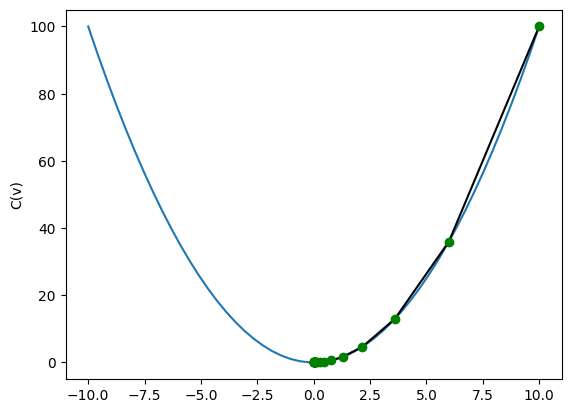

In [ ]:
import matplotlib.pyplot as plt

xs = np.linspace(-10, 10) # np.arange(-10, 11)
ys = xs**2
vsq = [v**2 for v in vector_array]
plt.plot(xs, ys, '-', vector_array, vsq, 'k-', vector_array, vsq, 'go')
plt.xlim(-11,11)
plt.ylabel('C(v)');

## Learning Rate Impact

The learning rate is a very important parameter of the algorithm. Different learning rate values can significantly affect the behavior of gradient descent. Consider the previous example, but with a learning rate of 0.8 instead of 0.2:

In [ ]:
# A learning rate of 0.8 instead of 0.2
_, varr = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.8)

iteration: 0: vector: 10.0
iteration: 1: vector: -6.0
iteration: 2: vector: 3.6000000000000014
iteration: 3: vector: -2.160000000000001
iteration: 4: vector: 1.2960000000000007
iteration: 5: vector: -0.7776000000000005
iteration: 6: vector: 0.4665600000000003
iteration: 7: vector: -0.2799360000000002
iteration: 8: vector: 0.16796160000000016
iteration: 9: vector: -0.10077696000000008
iteration: 10: vector: 0.060466176000000066
iteration: 11: vector: -0.036279705600000045
iteration: 12: vector: 0.02176782336000003
iteration: 13: vector: -0.013060694016000018
iteration: 14: vector: 0.007836416409600012
iteration: 15: vector: -0.004701849845760008
iteration: 16: vector: 0.002821109907456005
iteration: 17: vector: -0.001692665944473603
iteration: 18: vector: 0.0010155995666841621
iteration: 19: vector: -0.0006093597400104974
iteration: 20: vector: 0.00036561584400629846
iteration: 21: vector: -0.00021936950640377912
iteration: 22: vector: 0.00013162170384226751
iteration: 23: vector: -7.89

You get another solution that's very close to zero, but the internal behavior of the algorithm is different. This is what happens with the value of 𝑣 through the iterations:

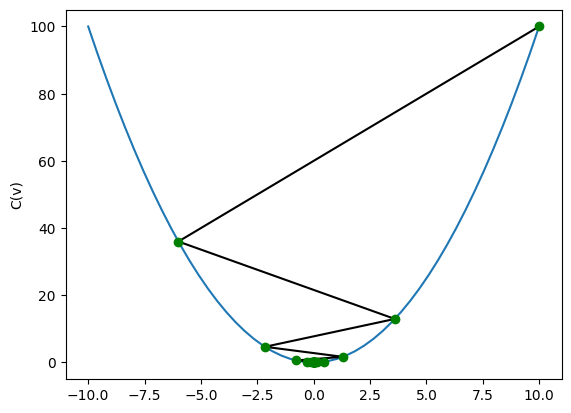

In [ ]:
vsq = [v**2 for v in varr]
plt.plot(xs, ys, '-', varr, vsq, 'k-', varr, vsq, 'go')
plt.xlim(-11,11)
plt.ylabel('C(v)');

In this case, you again start with 𝑣 = 10, but because of the high learning rate, you get a large change in 𝑣 that passes to the other side of the optimum and becomes −6. It crosses zero a few more times before settling near it.

Small learning rates can result in very slow convergence. If the number of iterations is limited, then the algorithm may return before the minimum is found. Otherwise, the whole process might take an unacceptably large amount of time. To illustrate this, run gradient_descent() again, this time with a much smaller learning rate of 0.005:

In [ ]:
# A learning rate of 0.8 instead of 0.2
_, varr = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.005)

iteration: 0: vector: 10.0
iteration: 1: vector: 9.9
iteration: 2: vector: 9.801
iteration: 3: vector: 9.70299
iteration: 4: vector: 9.605960099999999
iteration: 5: vector: 9.509900498999999
iteration: 6: vector: 9.414801494009998
iteration: 7: vector: 9.320653479069898
iteration: 8: vector: 9.2274469442792
iteration: 9: vector: 9.135172474836407
iteration: 10: vector: 9.043820750088043
iteration: 11: vector: 8.953382542587162
iteration: 12: vector: 8.863848717161291
iteration: 13: vector: 8.775210229989678
iteration: 14: vector: 8.687458127689782
iteration: 15: vector: 8.600583546412883
iteration: 16: vector: 8.514577710948755
iteration: 17: vector: 8.429431933839268
iteration: 18: vector: 8.345137614500876
iteration: 19: vector: 8.261686238355868
iteration: 20: vector: 8.17906937597231
iteration: 21: vector: 8.097278682212586
iteration: 22: vector: 8.01630589539046
iteration: 23: vector: 7.936142836436555
iteration: 24: vector: 7.856781408072189
iteration: 25: vector: 7.7782135939914

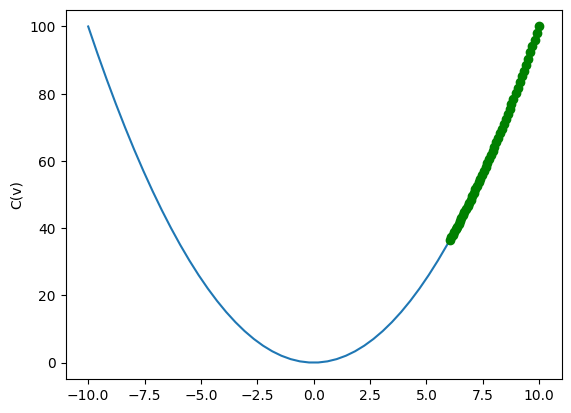

In [ ]:
vsq = [v**2 for v in varr]
plt.plot(xs, ys, '-', varr, vsq, 'k-', varr, vsq, 'go')
plt.xlim(-11,11)
plt.ylabel('C(v)');

The search process starts at 𝑣 = 10 as before, but it can't reach zero in fifty iterations. However, with a hundred iterations, the error will be much smaller, and with a thousand iterations, you'll be very close to zero.

Nonconvex functions might have local minima or saddle points where the algorithm can get trapped. In such situations, your choice of learning rate or starting point can make the difference between finding a local minimum and finding the global minimum.

## Ordinary Least Squares

As you've already learned, linear regression and the ordinary least squares method start with the observed values of the inputs 𝐱 = (𝑥₁, …, 𝑥ᵣ) and outputs 𝑦. They define a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, which is as close as possible to 𝑦.

This is an optimization problem. It finds the values of weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ that minimize the sum of squared residuals SSR = Σᵢ(𝑦ᵢ − 𝑓(𝐱ᵢ))² or the mean squared error MSE = SSR / 𝑛. Here, 𝑛 is the total number of observations and 𝑖 = 1, …, 𝑛.

You can also use the cost function 𝐶 = SSR / (2𝑛), which is mathematically more convenient than SSR or MSE.

The most basic form of linear regression is simple linear regression. It has only one set of inputs 𝑥 and two weights: 𝑏₀ and 𝑏₁. The equation of the regression line is 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Although the optimal values of 𝑏₀ and 𝑏₁ can be calculated analytically, you'll use gradient descent to determine them.

First, you need calculus to find the gradient of the cost function 𝐶 = Σᵢ(𝑦ᵢ − 𝑏₀ − 𝑏₁𝑥ᵢ)² / (2𝑛). Since you have two decision variables, 𝑏₀ and 𝑏₁, the gradient ∇𝐶 is a vector with two components:

∂𝐶/∂𝑏₀ = (1/𝑛) Σᵢ(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) = mean(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ)
∂𝐶/∂𝑏₁ = (1/𝑛) Σᵢ(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) 𝑥ᵢ = mean((𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) 𝑥ᵢ)
You need the values of 𝑥 and 𝑦 to calculate the gradient of this cost function. Your gradient function will have as inputs not only 𝑏₀ and 𝑏₁ but also 𝑥 and 𝑦. This is how it might look:

In [ ]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray

ssr_gradient() takes the arrays x and y, which contain the observation inputs and outputs, and the array b that holds the current values of the decision variables 𝑏₀ and 𝑏₁. This function first calculates the array of the residuals for each observation (res) and then returns the pair of values of ∂𝐶/∂𝑏₀ and ∂𝐶/∂𝑏₁.

In this example, you can use the convenient NumPy method ndarray.mean() since you pass NumPy arrays as the arguments.

gradient_descent() needs two small adjustments:

Add x and y as the parameters of gradient_descent() on line 4.
Provide x and y to the gradient function and make sure you convert your gradient tuple to a NumPy array on line 8.
Here's how gradient_descent() looks after these changes:

In [ ]:
import numpy as np

def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    vector_array = [start]
    for i in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            # print(f'iteration: {i}: vector: {vector}')
            break
        # print(f'iteration: {i}: vector: {vector}')
        vector += diff
        vector_array.append(vector)
    return vector, vector_array

gradient_descent() now accepts the observation inputs x and outputs y and can use them to calculate the gradient. Converting the output of gradient(x, y, vector) to a NumPy array enables elementwise multiplication of the gradient elements by the learning rate, which isn't necessary in the case of a single-variable function.

Now apply your new version of gradient_descent() to find the regression line for some arbitrary values of x and y:

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

x, y

(array([ 5, 15, 25, 35, 45, 55]), array([ 5, 20, 14, 32, 22, 38]))

In [ ]:
vector, _ = gradient_descent(
    ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008,
    n_iter=100_000
)
vector

array([5.62822349, 0.54012867])

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

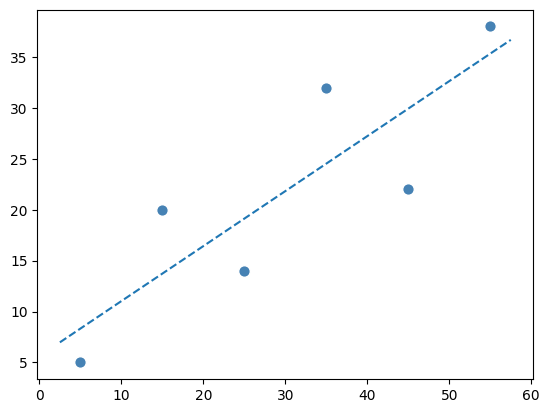

In [ ]:
plt.scatter(x, y, c='steelblue', edgecolor='white', s=70)
abline(vector[1], vector[0]);

The result is an array with two values that correspond to the decision variables: 𝑏₀ = 5.63 and 𝑏₁ = 0.54. The best regression line is 𝑓(𝑥) = 5.63 + 0.54𝑥. As in the previous examples, this result heavily depends on the learning rate. You might not get such a good result with too low or too high of a learning rate.

## Exercise 1: Repeat gradient descent example using [Sebastian Raschka's implementation of gradient descent in Chapter 10 of Python Machine Learning](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch10/ch10.ipynb):

In [ ]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [ ]:
lr = LinearRegressionGD(eta=0.0002, n_iter=100_000)

lr.fit(x.reshape(-1,1), y)

In [ ]:
lr.w_

array([5.63333333, 0.54      ])

## Exercise 2: Repeat gradient descent example using [Geeks for Geeks' implementation of gradient descent](https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/):

In [ ]:
def mean_squared_error(y_true, y_predicted):

	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

In [ ]:
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y,
                     iterations = 1000,
                     learning_rate = 0.0001,
                     stopping_threshold = 1e-6):

  # Initializing weight, bias, learning rate and iterations
  current_weight = 0.1
  current_bias = 0.01
  iterations = iterations
  learning_rate = learning_rate
  n = float(len(x))

  costs = []
  weights = []
  previous_cost = None

  # Estimation of optimal parameters
  for i in range(iterations):

    # Making predictions
    y_predicted = (current_weight * x) + current_bias

    # Calculating the current cost
    current_cost = mean_squared_error(y, y_predicted)

    # If the change in cost is less than or equal to
    # stopping_threshold we stop the gradient descent
    if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
      break

    previous_cost = current_cost

    costs.append(current_cost)
    weights.append(current_weight)

    # Calculating the gradients
    weight_derivative = -(2/n) * sum(x * (y-y_predicted))
    bias_derivative = -(2/n) * sum(y-y_predicted)

    # Updating weights and bias
    current_weight = current_weight - (learning_rate * weight_derivative)
    current_bias = current_bias - (learning_rate * bias_derivative)

    # Printing the parameters for each 1000th iteration
    # print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")


  # Visualizing the weights and cost at for all iterations
  plt.figure(figsize = (8,6))
  plt.plot(weights, costs)
  plt.scatter(weights, costs, marker='o', color='red')
  plt.title("Cost vs Weights")
  plt.ylabel("Cost")
  plt.xlabel("Weight")
  plt.show()

  return current_weight, current_bias

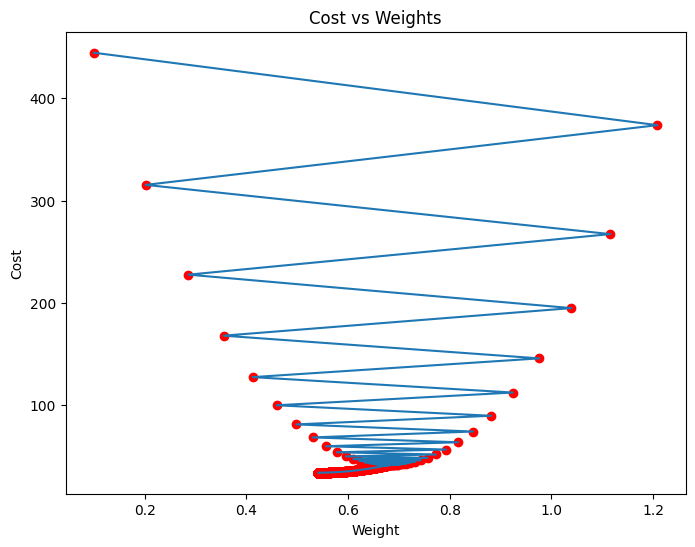



Estimated Weight: 0.5418184443769284
Estimated Bias: 5.561115508089055




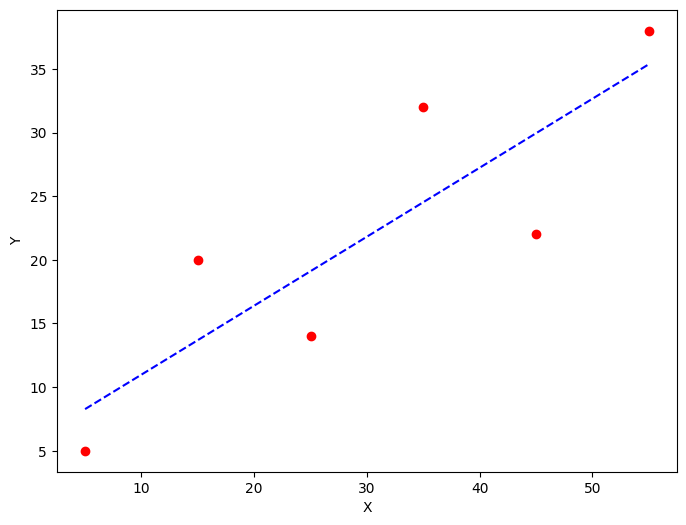

In [ ]:
estimated_weight, estimated_bias = gradient_descent(x, y, learning_rate=.0008, iterations=100_000)
print(f"\n\nEstimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}\n\n")

# Making predictions using estimated parameters
y_pred = estimated_weight*x + estimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(x, y, marker='o', color='red')
plt.plot([min(x), max(x)],
         [min(y_pred), max(y_pred)],
         color='blue',
         markerfacecolor='red',
         markersize=10,
         linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y");

## Exercise 3: Fit linear regression with scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x.reshape(-1,1), y)

LinearRegression()

In [ ]:
print(f'Intercept: {np.round(slr.intercept_,4)}\nSlope: {np.round(slr.coef_[0],4)}')

Intercept: 5.6333
Slope: 0.54


## Minibatches in Stochastic Gradient Descent

As in the case of the ordinary gradient descent, stochastic gradient descent starts with an initial vector of decision variables and updates it through several iterations. The difference between the two is in what happens inside the iterations:

Stochastic gradient descent randomly divides the set of observations into minibatches.
For each minibatch, the gradient is computed and the vector is moved.
Once all minibatches are used, you say that the iteration, or epoch, is finished and start the next one.
This algorithm randomly selects observations for minibatches, so you need to simulate this random (or pseudorandom) behavior. You can do that with random number generation. Python has the built-in random module, and NumPy has its own random generator. The latter is more convenient when you work with arrays.

You'll create a new function called sgd() that is very similar to gradient_descent() but uses randomly selected minibatches to move along the search space:

In [ ]:
import numpy as np

def sgd(
    gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50,
    tolerance=1e-06, dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()

You have a new parameter here. With batch_size, you specify the number of observations in each minibatch. This is an essential parameter for stochastic gradient descent that can significantly affect performance. Lines 34 to 39 ensure that batch_size is a positive integer no larger than the total number of observations.

Another new parameter is random_state. It defines the seed of the random number generator on line 22. The seed is used on line 23 as an argument to default_rng(), which creates an instance of Generator.

If you pass the argument None for random_state, then the random number generator will return different numbers each time it's instantiated. If you want each instance of the generator to behave exactly the same way, then you need to specify seed. The easiest way is to provide an arbitrary integer.

Line 16 deduces the number of observations with x.shape[0]. If x is a one-dimensional array, then this is its size. If x has two dimensions, then .shape[0] is the number of rows.

On line 19, you use .reshape() to make sure that both x and y become two-dimensional arrays with n_obs rows and that y has exactly one column. numpy.c_[] conveniently concatenates the columns of x and y into a single array, xy. This is one way to make data suitable for random selection.

Finally, on lines 52 to 70, you implement the for loop for the stochastic gradient descent. It differs from gradient_descent(). On line 54, you use the random number generator and its method .shuffle() to shuffle the observations. This is one of the ways to choose minibatches randomly.

The inner for loop is repeated for each minibatch. The main difference from the ordinary gradient descent is that, on line 62, the gradient is calculated for the observations from a minibatch (x_batch and y_batch) instead of for all observations (x and y).

On line 59, x_batch becomes a part of xy that contains the rows of the current minibatch (from start to stop) and the columns that correspond to x. y_batch holds the same rows from xy but only the last column (the outputs).

Now you can test your implementation of stochastic gradient descent:

In [ ]:
sgd(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008,
    batch_size=3, n_iter=100_000, random_state=0
)

array([5.63093736, 0.53982921])

## Exercise 4: Repeat stochastic gradient descent example using [Sebastian Raschka's implementation of stochastic gradient descent in Chapter 2 of Python Machine Learning](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb):

In [ ]:
class LinearRegressionSGD(object):
    """LinearRegressionSGD.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return self.activation(self.net_input(X))

In [ ]:
linear_sgd = LinearRegressionSGD(n_iter=100_000, eta=0.0002, random_state=0)

linear_sgd.fit(x.reshape(-1,1), y)

In [ ]:
linear_sgd.w_

array([5.58469347, 0.49397086])

## Extra: Fit linear regression with fake data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
a = 0.2
b = 0.3
sigma = 0.1
# set the random seed to get reproducible results
# change the seed to experiment with variation due to random noise
np.random.seed(4)  # consistent random number generation
X = np.arange(1,21)
deltas = sigma * np.random.normal(size=len(X))# added noise
y = a + deltas + b * X

fake = pd.DataFrame({'X': X, 'y': y})
fake

,X,y
0,1,0.505056
1,2,0.849995
2,3,1.000409
3,4,1.469360
4,5,1.658170
5,6,1.841542
6,7,2.235229
7,8,2.659858
8,9,2.933225
9,10,3.085252
